Case de IA


-lugares com preço de combustivel mais alto vende mais ou menos?
feriado vende mais ou menos?
Lugares com maior indice de desemprego - pessoas compram menos


1. Entendimento do problema
a. Qual é o problema? Qual a causa (ou possível causa)?
b. Por que resolver?
c. Qual pode ser uma boa métrica para avaliação do sucesso?
2. Entendimento dos dados
a. Quais os dados disponíveis e que informações podemos tirar deles?
b. Qual a variável target?
3. Pré-processamento
a. Limpeza de dados
b. Criação de outras variáveis
c. Normalização
d. Padronização
e. Lidar com outliers
f. Valores faltantes
4. Modelagem
a. Seleção, treinamento e teste de um algoritmo
b. Tunagem de hiperparâmetros
c. Documentar motivo da escolha
5. Avaliação
a. Analisar as métricas
b. Formular hipóteses de como o seu modelo poderia melhorar e iterar
(documentar essas hipóteses

1. Importando Bibliotecas


In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

2. Limpeza e Tratamento Dados


In [49]:
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')
features=pd.read_csv('features data set.csv')

In [50]:
#df de sales
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [51]:
#merge na stores e sales pelo store
df=pd.merge(sales,stores,on='Store',how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


In [52]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [53]:
#merge na features
df=pd.merge(df,features,on=['Date','Store','IsHoliday'],how='inner')
df.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [54]:
#dropou linhas
df.isna()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
#não faz sentido ter info do tamanho da loja 
#já que o A é para lojas grandes e o B para lojas pequenas
#vamos doprar essa coluna
df.drop(columns='Size',inplace=True)
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [56]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [58]:
df.head(1000)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dayweek
0,1,1,05/02/2010,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
1,1,2,05/02/2010,50605.27,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
2,1,3,05/02/2010,13740.12,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
3,1,4,05/02/2010,39954.04,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
4,1,5,05/02/2010,32229.38,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,72,07/05/2010,39104.10,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808,Friday
996,1,74,07/05/2010,11805.33,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808,Friday
997,1,78,07/05/2010,12.00,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808,Friday
998,1,79,07/05/2010,44039.92,False,A,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808,Friday


In [59]:
#criar colunas de mês e ano
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


3. Análise

In [65]:
#tem até 99 tipos de departamentos - a loja de store 1, pode ser do departamento 1,2,3,..., ou 99
df['Dept'].unique()


array(['Friday'], dtype=object)

In [61]:
#só 2010,11,12
df['Year'].unique()

array([2010, 2011, 2012])

In [62]:
#45 ids de lojas
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [26]:
df[(df['Store']==1)&(df['Dept']==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dayweek
0,1,1,05/02/2010,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday
73,1,1,12/02/2010,46039.49,True,A,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,Friday
145,1,1,19/02/2010,41595.55,False,A,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,Friday
218,1,1,26/02/2010,19403.54,False,A,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,Friday
290,1,1,05/03/2010,21827.90,False,A,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1,1,28/09/2012,18947.81,False,A,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,Friday
9956,1,1,05/10/2012,21904.47,False,A,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,Friday
10028,1,1,12/10/2012,22764.01,False,A,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,Friday
10101,1,1,19/10/2012,24185.27,False,A,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,Friday


In [63]:
#tirar date
df_without_date=df.drop(columns=['Date','Type']) 


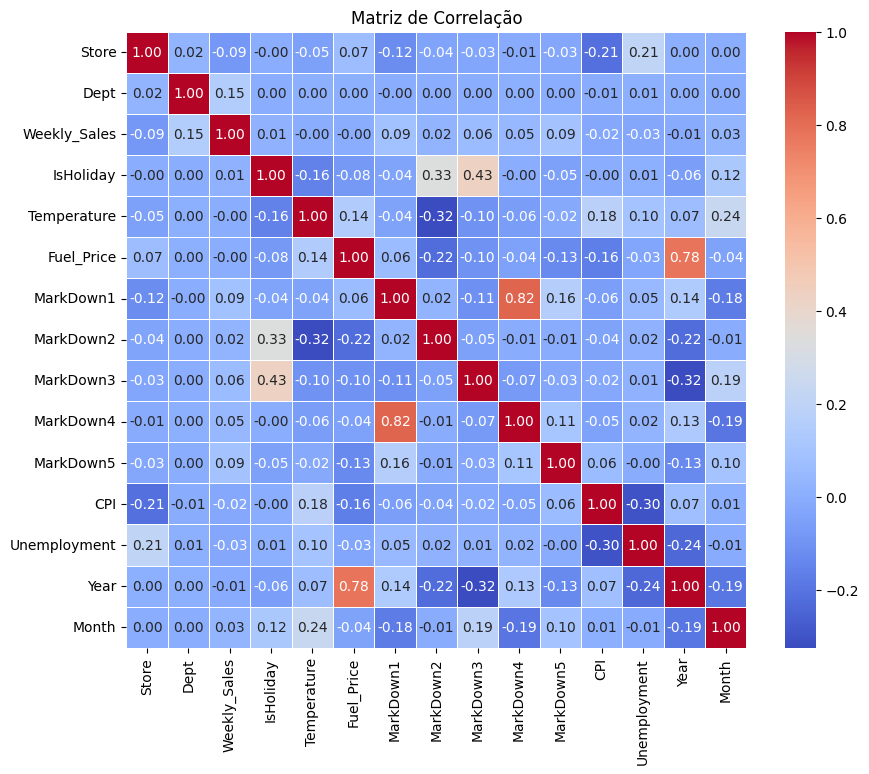

In [64]:
#correlação
correlacao = df_without_date.corr()

# Cria um mapa de calor (heatmap) usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

correlação maior entre o preço do combustível e o ano

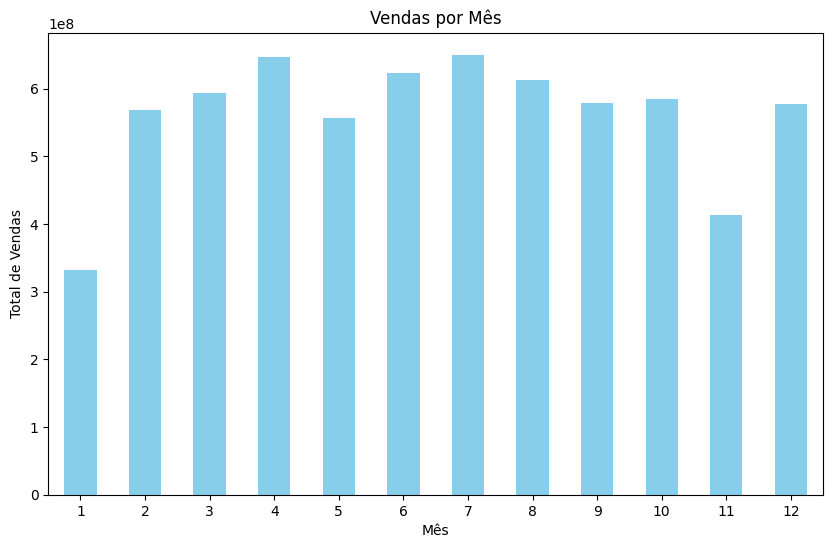

In [66]:
#vamo ver qual mês tem mais vendas semanais
vendas_por_mes = df.groupby('Month')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

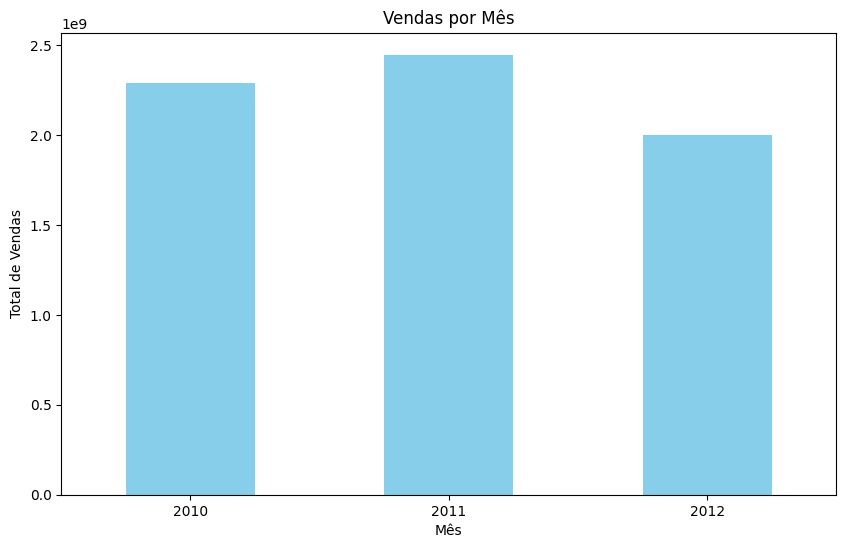

In [67]:
#vamo ver qual ano tem mais vendas semanais
vendas_por_mes = df.groupby('Year')['Weekly_Sales'].sum()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

In [71]:
#diferença da média de venda quando é feriado ou não
media_por_feriado = df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Exiba os resultados
print(media_por_feriado)

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


In [87]:
#quais são os feriados que tem?
feriados = df[df['IsHoliday'] == True][['Date','Weekly_Sales']]


In [91]:
#qual feriado que vende mais?
# Agrupa os dados por feriado e calcula a soma das vendas para cada feriado
vendas_por_feriado = feriados.groupby('Date')['Weekly_Sales'].sum()

# Encontra o feriado com as vendas mais altas
feriado_mais_vendido = vendas_por_feriado.idxmax()
vendas_mais_altas = vendas_por_feriado.max()

In [92]:
print(vendas_mais_altas)

66593605.26


In [68]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dayweek,Year,Month
0,1,1,2010-02-05,24924.50,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday,2010,2
1,1,2,2010-02-05,50605.27,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday,2010,2
2,1,3,2010-02-05,13740.12,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday,2010,2
3,1,4,2010-02-05,39954.04,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday,2010,2
4,1,5,2010-02-05,32229.38,False,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Friday,2010,2
